In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import pickle
import os
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
def loadmodel(name='DecisionTreeClassifier.pickle'):
    with open(name, 'rb') as f:
        model = pickle.load(f)
    return model

In [6]:
#model = DecisionTreeClassifier()
model=loadmodel()

In [7]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[0],data[1])

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.9999974522790638


In [11]:
model.predict(X_test)

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U11')

In [12]:
with open('DecisionTreeClassifier.pickle', 'wb') as f:
  pickle.dump(model, f)


In [13]:
def removeGreen(img, model, bg):
    if img.shape != bg.shape:
        bg = cv.resize(bg, (img.shape[1], img.shape[0]))
    """ a2, a1, a0 = model.coef_[0]

    B, G, R = cv.split(img)
    inter = np.ones_like(B)

    mask = a2 * B + a1 * G + a0 * R

    mask = 1 / (1 + np.exp(-mask)) """

    mask = model.predict(img.reshape(-1, 3))
    mask = mask.reshape(img.shape[0], img.shape[1])
    img[mask == '1'] = bg[mask == '1']

    return img


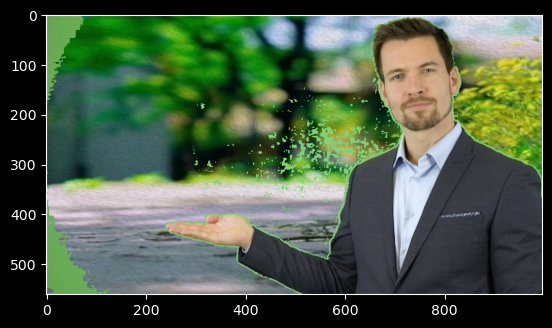

In [17]:
fg = cv.imread('foreground/fg-1.jpg', 1)
bg = cv.imread('background/bg-2.jpg', 1)

img = removeGreen(fg, model, bg)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)


In [15]:
def videoProcesing(model, bg, name='video/video.mp4') -> None:
    cap = cv.VideoCapture(name)
    fourcc = cv.VideoWriter_fourcc('h', '2', '6', '4')
    out_name = name.split('/')[1].split('.')[0]
    out = cv.VideoWriter(
        f'output_vid/output_{out_name}_DecisionTreeClassifier.mp4', fourcc, 30, (640, 480))
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            frame = cv.GaussianBlur(frame, (5, 5), 0)
            resized_frame = cv.resize(
                frame, (640, 480), fx=0, fy=0, interpolation=cv.INTER_CUBIC)
            processed_frame = removeGreen(resized_frame, model, bg)
            out.write(processed_frame)
            cv.imshow(f'{out_name}_DecisionTreeClassifier', processed_frame)
            if cv.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
    cap.release()
    out.release()
    cv.destroyAllWindows()


In [16]:
bg = cv.imread('background/bg-1.jpg', 1)
videoProcesing(model, bg,'video/video1.mp4')